In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('~\Downloads/interncareer/Tasks/youtubers_df.csv')

In [3]:
data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [5]:
data.shape

(1000, 9)

In [6]:
data.isna().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [7]:
data.Categories.value_counts().head()

Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Name: Categories, dtype: int64

In [8]:
data.Categories.fillna('Música y baile',inplace=True)

In [9]:
data.isna().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt

In [11]:
from scipy.stats import zscore

In [12]:
data1=pd.get_dummies(data)

In [13]:
z_score=pd.DataFrame(zscore(data1),columns=data.columns)

In [14]:
outliers=(abs(z_score)>3)

In [15]:
outliers.sum()

Rank           0
Username       0
Categories     0
Suscribers    17
Country        0
Visits         6
Likes          6
Comments       8
Links          0
dtype: int64

In [16]:
import seaborn as sns

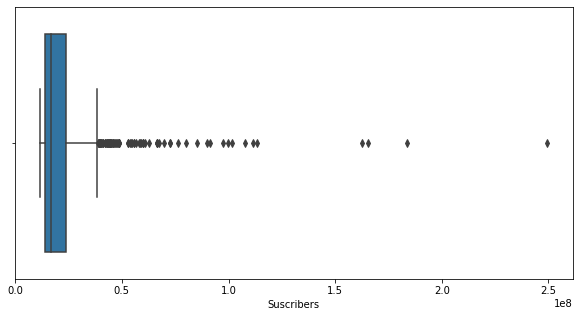

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['Suscribers'])
plt.show()

In [18]:
data_no_out=data[~outliers]

In [19]:
data_no_out.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,NaN,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",NaN,Estados Unidos,NaN,NaN,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,NaN,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Música y baile,NaN,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",NaN,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


C:\Users\muhsi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


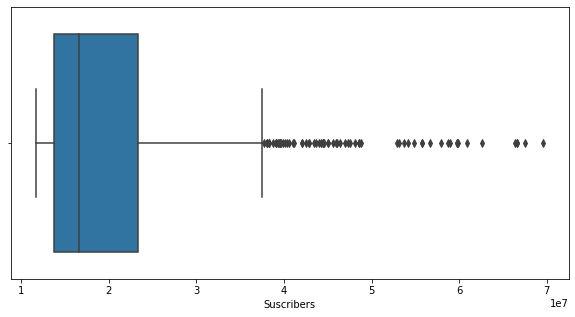

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data_no_out['Suscribers'])
plt.show()

In [21]:
data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [22]:
category_views=pd.DataFrame(data.groupby('Categories')['Visits'].mean().sort_values(ascending=False))[:10]
category_views

,Visits
Categories,
"Videojuegos, Humor",1.023968e+07
"Animación, Humor",3.760126e+06
Vlogs diarios,3.414338e+06
Comida y bebida,2.722450e+06
"Diseño/arte, Belleza",2.700000e+06
"Diseño/arte, DIY y Life Hacks",2.600000e+06
"Música y baile, Humor",2.402933e+06
Humor,2.310400e+06
"DIY y Life Hacks, Juguetes",2.300000e+06


In [23]:
streamer_views=pd.DataFrame(data.groupby('Username')['Suscribers'].mean().sort_values(ascending=False))[:10]
streamer_views

,Suscribers
Username,
tseries,249500000.0
MrBeast,183500000.0
CoComelon,165500000.0
SETIndia,162600000.0
KidsDianaShow,113500000.0
PewDiePie,111500000.0
LikeNastyaofficial,107500000.0
VladandNiki,101400000.0
zeemusiccompany,99700000.0


<Figure size 720x360 with 0 Axes>

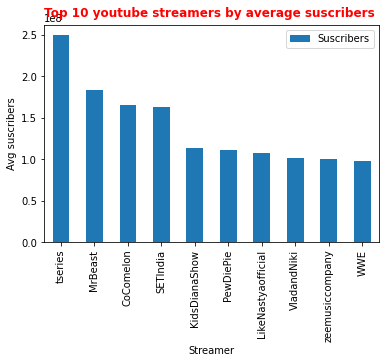

In [24]:
plt.figure(figsize=(10,5))
streamer_views.head(n=10).plot(kind='bar')
plt.title('Top 10 youtube streamers by average suscribers',color='red',loc='left',weight='bold',pad=8)
plt.xlabel('Streamer')
plt.ylabel('Avg suscribers')
plt.show()


In [25]:
correlation_matrix=data.corr()

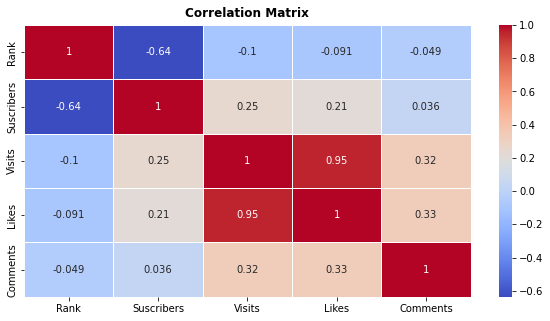

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Matrix',weight='bold',pad=8)
plt.show()

In [27]:
data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [28]:
data.groupby('Username')['Country'].count().sort_values(ascending=False)

Username
mgcplayhouse      2
HiTechIslamic     2
thexoteam         2
NickyJamTV        2
Family-Box        2
                 ..
MariaClaraeJP     1
MarkRober         1
MartaAndRustam    1
MartinGarrix      1
zutigang          1
Name: Country, Length: 994, dtype: int64

In [29]:
grouped_datagrouped_data=pd.DataFrame(data.groupby(['Country','Username'])['Suscribers'].sum())

In [30]:
group_data=pd.DataFrame(data.groupby(['Country','Categories'])['Suscribers'].sum())
group_data

Suscribers
Country        Categories                         
Arabia Saudita Animación, Videojuegos   13600000.0
               Música y baile           61000000.0
Argelia        Educación                12200000.0
               Música y baile           19300000.0
Argentina      Animación                25700000.0
...                                            ...
Unknown        Películas, Humor        113000000.0
               Películas, Juguetes     191700000.0
               Películas, Videojuegos   28700000.0
               Videojuegos, Juguetes    50500000.0
               Vlogs diarios           119800000.0

[181 rows x 1 columns]

In [31]:
heatmap_data=pd.pivot_table(group_data,index='Country',columns='Categories',values='Suscribers',aggfunc='sum',fill_value=0)

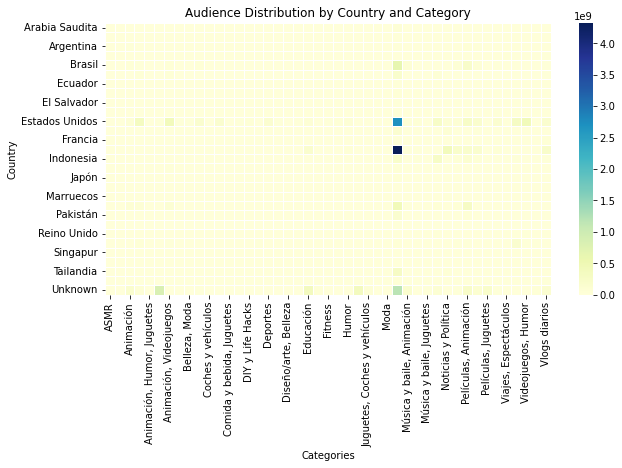

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data,cmap='YlGnBu',linewidths=.5)
plt.title('Audience Distribution by Country and Category')
plt.show()

In [33]:
avg=data[['Suscribers','Visits','Likes','Comments']].mean()
avg

Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64

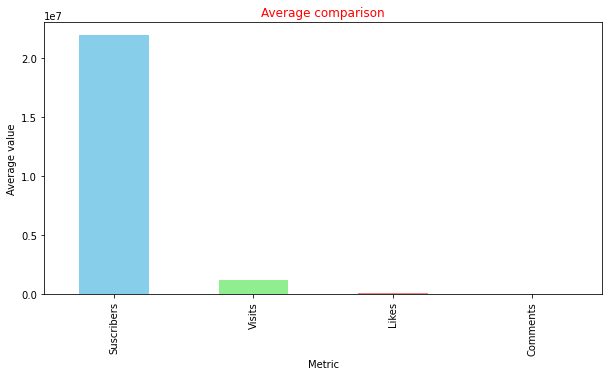

In [34]:
plt.figure(figsize=(10,5))
avg.plot(kind='bar',color=['skyblue','lightgreen','lightcoral','gold'])
plt.title('Average comparison',color='red')
plt.xlabel('Metric')
plt.ylabel('Average value')
plt.show()

In [35]:
cat=pd.DataFrame(data.groupby('Categories')['Username'].nunique().sort_values(ascending=False))[:10]
cat

,Username
Categories,
Música y baile,464
"Películas, Animación",61
"Música y baile, Películas",40
Vlogs diarios,37
Noticias y Política,36
"Animación, Videojuegos",34
"Películas, Humor",34
"Animación, Juguetes",28
"Animación, Humor",27


In [36]:
cat.idxmax()

Username    Música y baile
dtype: object

In [37]:
exception=data.groupby('Categories')[['Visits','Likes','Comments']].sum().sort_values('Visits',ascending=False)[:10]
exception

,Visits,Likes,Comments
Categories,,,
Música y baile,429102015.5,19306824.0,526794.0
"Videojuegos, Humor",174074500.0,7148700.0,82060.0
Vlogs diarios,126330500.0,6928063.0,36275.0
"Animación, Humor",101523400.0,3935745.0,144314.0
"Animación, Videojuegos",40802000.0,2695997.0,128745.0
"Películas, Animación",33631100.0,1565932.0,39385.0
Comida y bebida,32669400.0,1543977.0,36641.0
"Películas, Humor",31916600.0,1383277.0,34299.0
Educación,26545000.0,1081458.0,36894.0


In [38]:
exception.idxmax()

Visits      Música y baile
Likes       Música y baile
Comments    Música y baile
dtype: object

### Brands and Collaborations

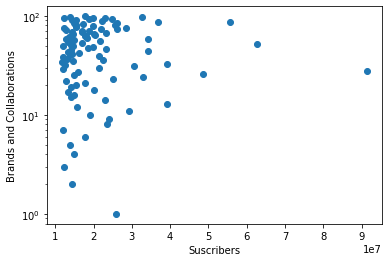

In [57]:
sample_data=data.sample(n=100)
plt.scatter(x='Suscribers',y='Links',data=sample_data)
plt.xlabel('Suscribers')
plt.ylabel('Brands and Collaborations')
plt.yscale('log')
plt.show()

## Top Streamers

In [40]:
data.Visits.mean()

1209446.3155

In [41]:
above_avg1=data.loc[data['Visits']>data.Visits.mean()]
above_avg1.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...


In [42]:
above_avg2=data.loc[data['Suscribers']>data.Suscribers.mean()]
above_avg2.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Música y baile,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [43]:
above_avg3=data.loc[data['Likes']>data.Likes.mean()]
above_avg3.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
10,11,BLACKPINK,Música y baile,91300000.0,Estados Unidos,863200.0,146900.0,3400.0,http://youtube.com/channel/UCOmHUn--16B90oW2L6...
14,15,BTS,Música y baile,76500000.0,India,969700.0,180300.0,7400.0,http://youtube.com/channel/UCLkAepWjdylmXSltof...
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...


In [44]:
above_avg4=data.loc[data['Comments']>data.Comments.mean()]
above_avg4.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
10,11,BLACKPINK,Música y baile,91300000.0,Estados Unidos,863200.0,146900.0,3400.0,http://youtube.com/channel/UCOmHUn--16B90oW2L6...
14,15,BTS,Música y baile,76500000.0,India,969700.0,180300.0,7400.0,http://youtube.com/channel/UCLkAepWjdylmXSltof...
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...


In [45]:
metric_above_avg=data[(data['Comments']>data.Comments.mean())&(data['Likes']>data.Likes.mean())\
                     
                     &(data['Suscribers']>data.Suscribers.mean())&(data['Visits']>data.Visits.mean())]
metric_above_avg.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
34,35,TaylorSwift,Música y baile,54100000.0,Estados Unidos,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...
39,40,JuegaGerman,"Películas, Animación",48600000.0,México,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...


In [46]:
metric_above_avg.shape

(38, 9)

In [47]:
top5=metric_above_avg.sort_values('Visits',ascending=False)[:5]
top5

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
136,137,MrBeast2,Vlogs diarios,31300000.0,Estados Unidos,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...
153,154,DaFuqBoom,"Animación, Humor",29800000.0,Estados Unidos,52700000.0,1700000.0,82800.0,http://youtube.com/channel/UCsSsgPaZ2GSmO6il8C...
288,289,VillageCookingChannel,Música y baile,22500000.0,India,21500000.0,321500.0,5900.0,http://youtube.com/channel/UCk3JZr7eS3pg5AGEvB...
300,301,alfredolarin,Música y baile,21900000.0,El Salvador,12900000.0,707600.0,2100.0,http://youtube.com/channel/UCd5ApCORQsMOZZz5E9...


## Recommendations

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()

In [52]:
scaler.fit_transform(data[['Suscribers', 'Visits',
       'Likes', 'Comments']])

array([[13.53237666, -0.21487969, -0.19747696, -0.17871646],
       [ 9.6083218 , 22.22752889, 20.34133014,  2.54047886],
       [ 8.53812503,  1.10774667, -0.11217808, -0.19022972],
       ...,
       [-0.60611189, -0.19092863, -0.20505693, -0.19022972],
       [-0.60611189, -0.22869172, -0.2076314 , -0.19008211],
       [-0.60611189, -0.23094909, -0.20782526, -0.19008211]])

In [58]:
user_item_matrix=data.pivot_table(index='Username',columns='Categories',values='Likes',aggfunc='sum',fill_value=0)
user_item_matrix.head()

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,Películas,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Username,,,,,,,,,,,,,,,,,,,,,
-genevievesplayhouse1465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GOSpanish,0,0,547,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GO_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1MILLION_Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1theK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
import numpy as np

In [83]:
category_similarity=cosine_similarity(user_item_matrix.T)
# Replace 'target_streamer_username' with the actual streamer username you want recommendations for
target_streamer_username = '123GO_'
if target_streamer_username in user_item_matrix.index:
    # Get the target streamer's likes for watched categories
    target_streamer_likes = user_item_matrix.loc[target_streamer_username]

# Calculate the predicted likes based on category similarity
predicted_likes = category_similarity.dot(target_streamer_likes)

# Filter out the categories the streamer has already covered
predicted_likes = predicted_likes[target_streamer_likes == 0]

# Get top-N recommendations
n_recommendations = 5
top_indices = np.argpartition(predicted_likes, -n_recommendations)[-n_recommendations:]
top_recommendations = [(user_item_matrix.columns[i], predicted_likes[i]) for i in top_indices]
# Print the top recommendations
for i, (Categories, estimated_likes) in enumerate(sorted(top_recommendations,key=lambda x:x[1],reverse=True)):
    print(f"Recommendation #{i + 1}: Category {Categories}")

Recommendation #1: Category Deportes
Recommendation #2: Category DIY y Life Hacks
Recommendation #3: Category Comida y bebida, Juguetes
Recommendation #4: Category Comida y bebida, Salud y autoayuda
Recommendation #5: Category Videojuegos, Juguetes
